In [1]:
# TRASH
# g.degree("Arizona")

# get the list of nodes


### Inspect the graph structure - EDGES
# number of edges
# my_network.number_of_edges()
# my_network.size()
# assert my_network.number_of_edges() == my_network.size()
# NB: can get the number of edges between specific set of Nodes
# my_network.number_of_edges("BrighamYoung", "Arizona")
# my_network.has_edge("BrighamYoung", "Arizona")
# my_network.has_edge("NewMexico", "Wyoming")

In [2]:
import os

from itertools import permutations 

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import matplotlib.pyplot as plt
%matplotlib inline

#### 1)	Check which version of python you are using. Load networkx and check which version of this package you have installed.

Hint: the tutorial of networkx is a good guide to get started ( https://networkx.github.io/documentation/stable/tutorial.html )

In [3]:
import sys
sys.version

import networkx as nx
nx.__version__

'3.5.2 (default, Oct  8 2019, 13:06:37) \n[GCC 5.4.0 20160609]'

'2.2'

#### 2)	What is a “gml” file? Import the FootballNetwork.

Hint: Networkx documentation is your friend (https://networkx.github.io/documentation/stable/reference/ ). 
Check out “Reading and writing graphs”.

Graph Modeling Language (GML) is a hierarchical ASCII-based file format for describing graphs. (wikipedia)

In [4]:
graph_file = "FootballNetwork/football_network.gml"
g = nx.read_gml(graph_file)

#### 3)	How many teams are in this network? What is the difference between the size and the order of a graph? Retrieve these features for FootballNetwork (provide 2 ways of doing it).

Hint: many functionalities are already implemented in Networkx, but you can also implement them yourself in your own way. Try both approaches, so you can get more and more familiar both with coding in Python and with Networkx.

size of a graph = number of edges

order of a graph = number of nodes

In [5]:
# the number of teams = number of nodes in the network

# ORDER = # OF NODES
# -> using networkx functions: nx.order() or nx.number_of_nodes()
g.number_of_nodes()
g.order()
assert g.number_of_nodes() == g.order()
# -> using len() on node list
assert len(list(g.nodes)) == g.number_of_nodes()
assert len(list(g.nodes())) == g.number_of_nodes()

# SIZE = # OF EDGES

### Inspect the graph structure - EDGES
# -> using networkx functions: nx.size() or nx.number_of_edges()
g.number_of_edges()
g.size()
assert g.number_of_edges() == g.size()
assert len(list(g.edges)) == g.number_of_edges()
assert len(list(g.edges())) == g.number_of_edges()

115

115

613

613

#### 4)	What is the density of a graph? What is the density of FootballNetwork?

“Network density” describes the portion of the potential connections in a network that are actual connections. 
A “potential connection” is a connection that could potentially exist between two “nodes” – regardless of whether or not it actually does. 
An “actual connection” is one that actually exists. This person does know that person; this computer is connected to that one.


(www.the-vital-edge.com)

In [6]:
# The complete graph on n vertices is denoted by Kn. 
# Kn has n(n − 1)/2 edges (a triangular number), and is a regular graph of degree n − 1. 

n_edges = g.number_of_edges()
n_nodes = g.number_of_nodes()
max_edges = n_nodes*(n_nodes-1)*0.5

g_density1 = 2*n_edges/(n_nodes*(n_nodes-1))
g_density2 = n_edges/max_edges

nx.density(g)

assert g_density1 == g_density2
assert g_density1 == nx.density(g)


0.0935163996948894

#### 5)	Is “SaltLakeCity” present in this network? And “Arizona”?

In [7]:
g.has_node("SaltLakeCity")
"SaltLakeCity" in list(g.nodes())
# False

g.has_node("Arizona")
"Arizona" in list(g.nodes())
# True

False

False

True

True

#### 6)	Are “NewMexico” and “Wyoming” connected?

In [8]:
g.has_edge("NewMexico", "Wyoming")
# True

True

#### 7)	Who are the neighbors of “Stanford”? Provide 2 ways of retrieving this information.

In [9]:
list(nx.ego_graph(g, "Stanford", radius=1).nodes())
list(dict(g["Stanford"]).keys())
list(g['Stanford'])
list(g.neighbors("Stanford"))

['SouthernCalifornia',
 'UCLA',
 'California',
 'NotreDame',
 'SanJoseState',
 'WashingtonState',
 'Stanford',
 'OregonState',
 'Texas',
 'ArizonaState',
 'Washington',
 'Arizona']

['OregonState',
 'SanJoseState',
 'ArizonaState',
 'Texas',
 'NotreDame',
 'UCLA',
 'Arizona',
 'SouthernCalifornia',
 'Washington',
 'WashingtonState',
 'California']

['OregonState',
 'SanJoseState',
 'ArizonaState',
 'NotreDame',
 'UCLA',
 'Washington',
 'Arizona',
 'SouthernCalifornia',
 'Texas',
 'WashingtonState',
 'California']

['OregonState',
 'SanJoseState',
 'ArizonaState',
 'NotreDame',
 'UCLA',
 'Washington',
 'Arizona',
 'SouthernCalifornia',
 'Texas',
 'WashingtonState',
 'California']

#### 8)	Find 2 nodes of FootballNetwork that are not neighbors.


In [10]:
n1="Stanford"
n1_neigh = list(g[n1])

nn1 = [x for x in list(g.nodes()) if x not in n1_neigh and x != n1] 

nn2 = list(nx.non_neighbors(g, n1))

len(nn1)
len(nn2)

103

103

#### 9)	How many matches each team played? How many matches they played in total? Which team played the most / least during this season?


In [11]:
# number of matches = degree of the nodes
degrees = dict(nx.degree(g))
nbr_matches = degrees.values()
sum(nbr_matches)
min(nbr_matches)
max(nbr_matches)

[team for team, nbr in degrees.items() if nbr == min(nbr_matches) ]
degrees['Connecticut']
[team for team, nbr in degrees.items() if nbr == max(nbr_matches) ]


1226

7

12

['Connecticut']

7

['BrighamYoung',
 'NevadaLasVegas',
 'FloridaState',
 'TexasTech',
 'SouthernMethodist',
 'Tulsa',
 'SouthernCalifornia',
 'Iowa',
 'Wisconsin',
 'Nevada',
 'PennState',
 'KansasState']

#### 10)	What is a directed network?  Is FootballNetwork a directed network?

a directed graph (or digraph) is a graph that is made up of a set of vertices connected by edges, where the edges have a direction associated with them (wikipedia)

In [12]:
nx.is_directed(g)
False

False

False

#### 11)	What is a weighted network? Is FootballNetwork a weighted network?


 a graph with edges associated with numerical value (a weight)

In [13]:
nx.is_weighted(g)

False

#### 12)	Which information are associated with the nodes? And with the edges?

Hint: remember that in Networkx nodes, edges and graphs can retain “attributes” that you can explore and manipulate

In [14]:
list(g.node['Arizona'].keys())
list(list(dict(g.nodes).values())[0].keys())

['federation']

['federation']

#### 13)	What is the “federation” number of “Rutgers”?

In [1]:
fed_dict = dict(g.nodes(data="federation"))
fed_dict['Rutgers']

fed_attr = nx.get_node_attributes(g, 'federation')
fed_attr['Rutgers']
# 1

g.nodes["Rutgers"]

NameError: name 'g' is not defined

#### 14)	How many different “federations” are represented?

In [16]:
fed_attr = nx.get_node_attributes(g, 'federation')
len(set(fed_attr.values()))
# 12

12

#### 15)	Which federation has the largest number of teams?


In [17]:
fed_attr = nx.get_node_attributes(g, 'federation')
feds = list(fed_attr.values()) 
fed_dict = {x:feds.count(x) for x in feds}
fed_dict

assert sum(fed_dict.values()) == len(list(g.nodes()))

[fed for fed, nbr in fed_dict.items() if nbr == max(fed_dict.values()) ]


{0: 9,
 1: 8,
 2: 11,
 3: 12,
 4: 10,
 5: 5,
 6: 13,
 7: 8,
 8: 10,
 9: 12,
 10: 7,
 11: 10}

[6]

#### 16)	List all nodes associated with the “federation” n°10.


In [18]:
fed_team_dict = {x: [team for team, fed in fed_attr.items() if fed_attr[team] == x] for x in feds }   
fed_team_dict[10]
[x for x,y in g.nodes(data=True) if y['federation']== 10]

#filter(lambda (n, d): g['federation'] == 10, g.nodes(data=True)) # not working python3

['NorthTexas',
 'ArkansasState',
 'MiddleTennesseeState',
 'LouisianaLafayette',
 'NewMexicoState',
 'LouisianaMonroe',
 'Idaho']

['NorthTexas',
 'ArkansasState',
 'MiddleTennesseeState',
 'LouisianaLafayette',
 'NewMexicoState',
 'LouisianaMonroe',
 'Idaho']

#### 17)	Pick one of the nodes connected to “Maryland”. Retrieve all the neighbors that “Maryland” and the other nodes have in common. Do they all share the same “federation”?


In [19]:
n1 = "Maryland"
n2 = list(dict(g[n1]).keys())[0]

common_neighb = list(nx.common_neighbors(g, n1, n2))
print(common_neighb)

n1_neighb = list(dict(g[n1]).keys())
n2_neighb = list(dict(g[n2]).keys())
common_neighb2 = [x for x in n1_neighb if x in n2_neighb]
print(common_neighb2)

all_feds = [nx.get_node_attributes(g, 'federation')[x] for x in [n1,n2]+common_neighb ]
print(all_feds)

['Temple']
['Temple']
[0, 1, 1]


#### 18)	Plot this network. Try different layouts and settings (with/without labels, etc.).

Hint: have a look at the “Drawing” section of Networkx documentation. You can also find many examples with code here: https://networkx.github.io/documentation/stable/auto_examples/index.html 

/usr/local/lib/python3.5/dist-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


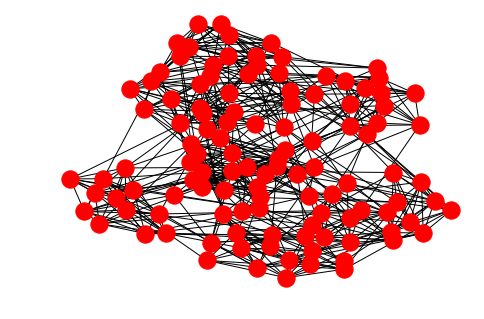

In [20]:
nx.draw(g)

/usr/local/lib/python3.5/dist-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


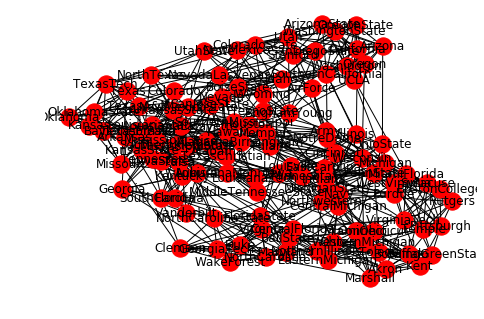

In [21]:
 nx.draw(g,pos=nx.spring_layout(g),with_labels=True) 

#### 19)	Plot only the nodes, color-coded for their federation number. 


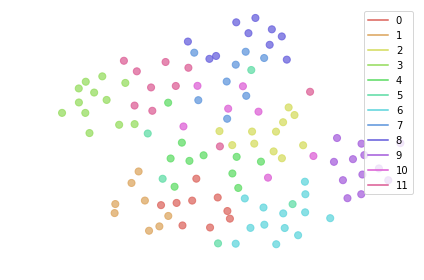

In [22]:
import seaborn as sns


def plot_graph_communities_with_col(g, g_pos, attr_col):
    attrib_dict = dict(g.nodes(data=attr_col))
    col_palette = sns.color_palette("hls", 1+max(attrib_dict.values()))
    # retrieve the color
    # col => order should be same order as is "nodelist" [default: G.nodes()]
    nodes_to_plot = g.nodes()
    nodes_col = [col_palette[attrib_dict[x]] for x in list(nodes_to_plot)]
    #nodes_col = [ fed_dict[x] for x in list(nodes_to_plot)]

    legend_palette_tmp = [ attrib_dict[x] for x in nodes_to_plot]
    legend_palette_txt = list(set(legend_palette_tmp))
    legend_palette_col = [col_palette[x] for x in set(legend_palette_tmp)]

    # Using a figure to use it as a parameter when calling nx.draw_networkx
    f = plt.figure(1)
    ax = f.add_subplot(1,1,1)
    for txt, col in zip(legend_palette_txt, legend_palette_col):
        _=ax.plot([0],[0],
                color=col,
                label=txt)
    # Just fixed the color map
    _=nx.draw_networkx_nodes(g, 
                           pos=g_pos, 
                           #col='red',
                           nodelist = nodes_to_plot,
                           node_color = nodes_col,
                           node_size=50,
                           alpha=0.7)
    # Setting it to how it was looking before.                                                                                                              
    _=plt.axis('off')
    _=f.set_facecolor('w')
    _=plt.legend(loc='best')
    _=f.tight_layout()
    plt.show()
    
plot_graph_communities_with_col(g = g, 
                                g_pos=nx.spring_layout(g), # positions for all nodes, 
                                attr_col = 'federation')

/usr/local/lib/python3.5/dist-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


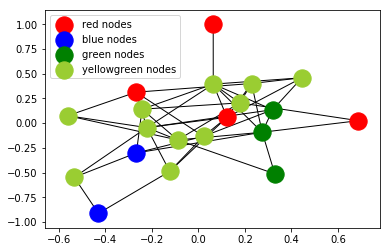

In [32]:
import networkx as nx
import matplotlib.pyplot as plt
G=nx.fast_gnp_random_graph(20,0.2)

rednodes = [1,2,4,5]
bluenodes = [10,12]
greennodes=[3,6,9]
yellowgreennodes = [node for node in G.nodes() if node not in rednodes+greennodes+bluenodes]
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos=pos,nodelist=rednodes, node_color='red', label='red nodes')
nx.draw_networkx_nodes(G,pos=pos,nodelist=bluenodes, node_color='blue', label='blue nodes')
nx.draw_networkx_nodes(G,pos=pos,nodelist=greennodes, node_color='green', label='green nodes')
nx.draw_networkx_nodes(G,pos=pos,nodelist=yellowgreennodes, node_color='yellowgreen', label='yellowgreen nodes')
nx.draw_networkx_edges(G,pos=pos)
plt.legend(numpoints = 1) #Instead of numpoints = 1, use scatterpoints = 1
plt.show()

#### 20)	Add “Lausanne” to this network (connect it to the node of your choice). Draw the network with a special color only for Lausanne. 


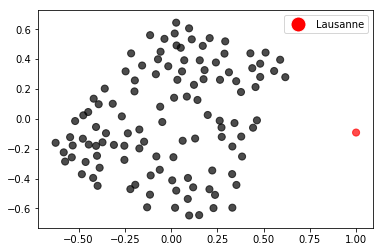

In [7]:
graph_file = "FootballNetwork/football_network.gml"
import networkx as nx
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

g = nx.read_gml(graph_file)
g.add_node("Lausanne")
g.add_edge("Lausanne", "Iowa")

nodes_col = [ 'red' if x == 'Lausanne' else 'black' for x in list(g.nodes()) ]

g_pos=nx.spring_layout(g) # positions for all nodes

nx.draw_networkx_nodes(g, 
                       pos=g_pos,
                       nodelist = g.nodes(),
                       node_color = nodes_col,
                       node_size=50,
                       alpha=0.7)

#red_patch = mpatches.Patch(color='red', label='Lausanne')
#plt.legend(handles=[red_patch])
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Lausanne',
                          markerfacecolor='r', markersize=15)]
plt.legend(handles=legend_elements, loc='best')

#### 21)	Add “Lausanne” to the “federation” n°4.


In [24]:
# !!! name the arguments, order has changed !!!
nx.set_node_attributes(g, name='federation', values={'Lausanne': 4})
g.node['Lausanne']['federation']

4

#### 22)	Create a subgraph containing only the nodes associated with the “federation” n°4. 


In [25]:
fed4_nodes = [x for x,y in g.nodes(data=True) if y['federation'] == 4]

g_fed4 = g.subgraph(fed4_nodes)

#### 23)	Plot the subgraph and customize it (node/edge colors and shapes, line widths, add a legend, etc.). 


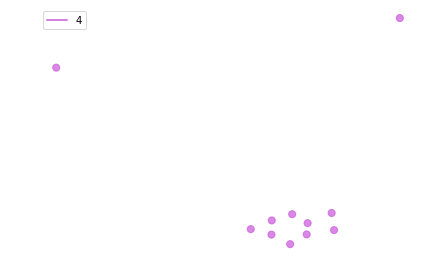

In [26]:
plot_graph_communities_with_col(g = g_fed4, 
                                g_pos=nx.spring_layout(g_fed4), # positions for all nodes, 
                                attr_col = 'federation')

#### 24)	Remove “Lausanne” from the network.


In [27]:
g.remove_node("Lausanne")

#### 25)	Which teams did the opponents of Duke play against? Which team has similar opponents as Duke?


In [28]:
duke_opponents = list(g['Duke'].keys())
duke_opponents 
for duke_opp in duke_opponents:
    opp_of_duke_opp = list(g[duke_opp].keys())
    # how many are in duke opponents ?
    comm_opp = [x for x in opp_of_duke_opp if x in duke_opponents] 
    print(duke_opp + ": " + str(len(comm_opp)) + "/" + str(len(opp_of_duke_opp)))

    

['GeorgiaTech',
 'EastCarolina',
 'Virginia',
 'Northwestern',
 'NorthCarolina',
 'Vanderbilt',
 'FloridaState',
 'Clemson',
 'NorthCarolinaState',
 'WakeForest',
 'Maryland']

GeorgiaTech: 7/11
EastCarolina: 0/11
Virginia: 7/10
Northwestern: 0/11
NorthCarolina: 7/11
Vanderbilt: 1/11
FloridaState: 7/12
Clemson: 7/10
NorthCarolinaState: 7/11
WakeForest: 8/10
Maryland: 7/11


#### 26)	Do teams in the same federation tend to have similar opponents compared to teams in different federations?


#### 27)	Draw the degree distribution (https://mathinsight.org/degree_distribution) of the network.


#### 28)	Calculate the global clustering coefficient (https://www.youtube.com/watch?v=K2WF4pT5pFY) of the network. Draw the clustering coefficient distribution of the network.


Wikipedia: le coefficient de clustering d'un graphe (aussi appelé coefficient d'agglomération, de connexion, de regroupement, d'agrégation ou de transitivité), est une mesure du regroupement des nœuds dans un réseau. Plus précisément ce coefficient mesure à quel point le voisinage d'un sommet est connecté. 
This measure gives an indication of the clustering in the whole network (global), and can be applied to both undirected and directed networks (often called transitivity).

Le coefficient de clustering global est défini comme

    C = 3 × nombre de triangles nombre de triplets connectés / nombre de triplets connectés
    
triangle = sous-graphe complet (=tous les sommets sont adjacents = reliés par une arête) à 3 noeuds
triplet connecté = sous-graphe connexe (=graphe d'un seul tenant; existe une chaine qui relie toutes les paires de noeuds) à 3 noeuds



In [29]:
global_clust = nx.transitivity(g) # 3 * #triangles/#triads
# graph transitivity = the fraction of all possible triangles present in G.
# Possible triangles are identified by the number of “triads” (two edges with a shared vertex).


In [30]:
all_tri = nx.triangles(g)
n_tri = sum(list(all_tri.values()))
n_tri

2430

In [16]:
all_coeff = [nx.clustering(g)[x] for x in nx.clustering(g)]

(array([ 1.,  1.,  5.,  4.,  8., 39., 26., 23.,  5.,  4.]),
 array([0.        , 0.06666667, 0.13333333, 0.2       , 0.26666667,
        0.33333333, 0.4       , 0.46666667, 0.53333333, 0.6       ,
        0.66666667]),
 <a list of 10 Patch objects>)

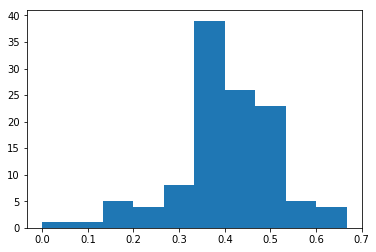

In [17]:
plt.hist(all_coeff)